In [1]:
%pip install numpy
%pip install matplotlib
%pip install noise


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


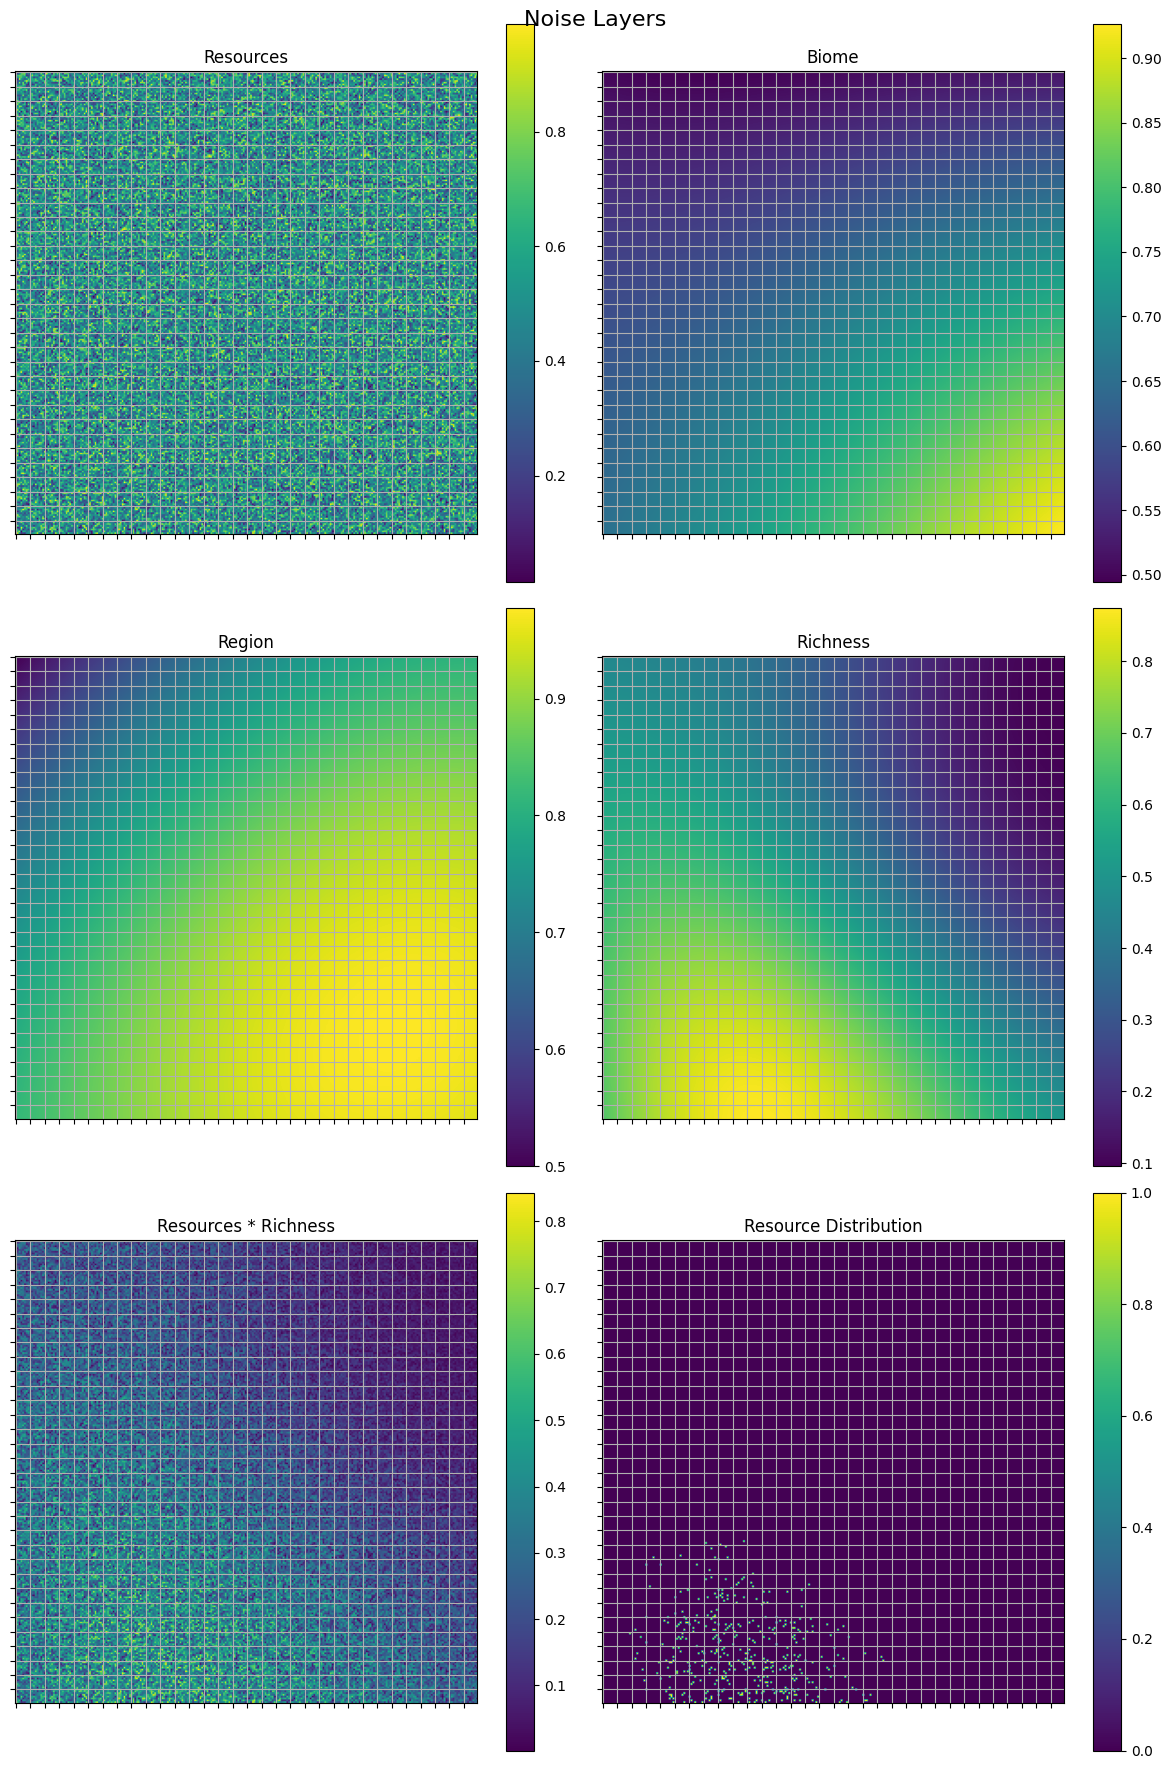

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import noise

map_size = 256
ref_size = 1024
shape = (map_size, map_size)

def generate_noise_layer(scale=1.0, z_layer=0.0):
    """
    Generate Perlin noise using the noise library.
    """
    noise_array = np.zeros(shape)
    for x in range(shape[0]):
        for y in range(shape[1]):
            noise_array[x][y] = noise.snoise3(scale * (x / ref_size), scale * (y / ref_size), z_layer)
    return (noise_array / 2.0) + 0.5

def display_multiple_noise_layers(noise_layers, titles=None):
    """
    Display multiple noise layers as subplots.

    Parameters:
    noise_layers (list): List of 2D numpy arrays, each representing a noise layer
    titles (list): Optional list of titles for each subplot
    """
    num_layers = len(noise_layers)
    rows = int(np.ceil(np.sqrt(num_layers)))
    cols = int(np.ceil(num_layers / rows))

    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
    fig.suptitle("Noise Layers", fontsize=16)

    if num_layers == 1:
        axes = np.array([axes])

    for i, noise_array in enumerate(noise_layers):
        ax = axes.flat[i]
        ax.set_xticks(np.arange(0, noise_array.shape[1], 8))
        ax.set_yticks(np.arange(0, noise_array.shape[0], 8))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True)
        im = ax.imshow(noise_array, cmap='viridis')
        if titles and i < len(titles):
            ax.set_title(titles[i])
        else:
            ax.set_title(f"Layer {i+1}")
        fig.colorbar(im, ax=ax)

    # Hide any unused subplots
    for j in range(i+1, rows*cols):
        axes.flat[j].axis('off')

    plt.tight_layout()
    plt.show()

num_layers = 4  # You can change this to any number
layers = [
    { "scale": 2000.0, "z_layer": 0.0, "name": "Resources" },
    { "scale": 1.0, "z_layer": 0.5, "name": "Biome" },
    { "scale": 1.0, "z_layer": 0.1, "name": "Region" },
    { "scale": 2.0, "z_layer": 1.5, "name": "Richness" }
]

noise_layers = [generate_noise_layer(layer["scale"], layer["z_layer"]) for layer in layers]
titles = [layer["name"] for layer in layers]

richness = noise_layers[3]
resources = noise_layers[0]
noise_layers.append(resources * richness)
titles.append("Resources * Richness")

noise_layers.append(np.where(noise_layers[4] > 0.8, 1, 0))
titles.append("Resource Distribution")

display_multiple_noise_layers(noise_layers, titles)
